In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
# Handling data imbalance
from imblearn.under_sampling import NearMiss

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# File path
file_path = 'drive/MyDrive/LetterRecognition/Colab Notebooks/A_Z Handwritten Data.csv'

# Load Data
df = pd.read_csv(file_path)
# df = pd.read_csv("/content/drive/MyDrive/ML/Final Project/LetterRecognition/Colab Notebooks/A_Z Handwritten Data.csv")

In [4]:
# Get the labels
y = df.pop('0')

In [5]:
nm = NearMiss()
x_data, y_data = nm.fit_resample(df, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data,   
    test_size = 0.07, random_state=10, shuffle=True, stratify=y_data
)

In [7]:
# normalizing features, data ranges frrom 0-255
X_train = 2*X_train/255 -1
X_test = 2*X_test/255-1

In [8]:
def test_prediction(model):
    temp_val = model.predict(X_test)
    running_total = 0
    numpy_test = y_test.to_numpy()
    for k in range(len(temp_val)):
        if temp_val[k] == numpy_test[k]:
            running_total += 1
    return running_total / len(temp_val)

In [ ]:
m_dict = {}
penalties = ['l1', 'l2', 'None']
C_values = [1,10, 100]
for p in penalties:
    for c in C_values:
        key = "{}_{}".format(p,c)
        m_dict[key] = LogisticRegression(
            penalty=p,
            C=c,
            solver='saga',
            multi_class='multinomial',
            ).fit(X_train,y_train)
        print("Calculated model: {}".format(key))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Calculated model: l1_1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Calculated model: l1_10


In [14]:
m_dict

{'l2_1': LogisticRegression(C=1, multi_class='multinomial', solver='saga'),
 'l2_10': LogisticRegression(C=10, multi_class='multinomial', solver='saga'),
 'l2_100': LogisticRegression(C=100, multi_class='multinomial', solver='saga'),
 'none_1': LogisticRegression(C=1, multi_class='multinomial', penalty='none',
                    solver='saga'),
 'none_10': LogisticRegression(C=10, multi_class='multinomial', penalty='none',
                    solver='saga'),
 'none_100': LogisticRegression(C=100, multi_class='multinomial', penalty='none',
                    solver='saga')}

Text(0.5, 0, 'C value')

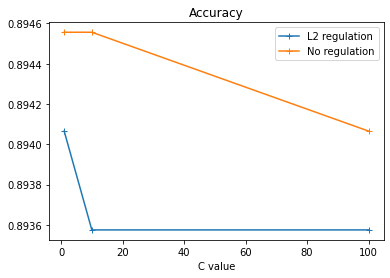

In [15]:
l1 = []
l2 = []
N = []
for key in m_dict.keys():
  if key[1] == "1":
    l1.append(test_prediction(m_dict[key]))
  if key[1]=="2":
    l2.append(test_prediction(m_dict[key]))
  elif key[0]=='N':
    N.append(test_prediction(m_dict[key]))

plt.figure(1)
plt.plot(C_values, l1, ls='-', marker='+')
plt.plot(C_values, l2, ls='-', marker='+')
plt.plot(C_values, N, ls='-', marker='+')
plt.legend(['L1 regulation','L2 regulation','No regulation'])
plt.title('Accuracy')
plt.xlabel('C value')








In [19]:
score_dict = {}
for model in m_dict:
    score_dict[model] = test_prediction(m_dict[model])

In [20]:
for i in score_dict.keys():
    print("Model: {}\n score: {}\n weights: {}".format(
        i,
        score_dict[i], "N/A"
        # m_dict[i].coef_
    ))

Model: l2_1
 score: 0.8940657184894556
 weights: N/A
Model: l2_10
 score: 0.8935752820009809
 weights: N/A
Model: l2_100
 score: 0.8935752820009809
 weights: N/A
Model: none_1
 score: 0.8945561549779304
 weights: N/A
Model: none_10
 score: 0.8945561549779304
 weights: N/A
Model: none_100
 score: 0.8940657184894556
 weights: N/A
